In [152]:
!pip install scikit-learn

!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [156]:
#liste des librairies utilisées

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

In [8]:
#Récupération des données sur Github 

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)
print(data.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


1. Collecte et préparation des données

Description du Dataset Boston Housing:

Le dataset de Boston Housing contient des informations collectées par le U.S Census Service concernant le logement dans la région de Boston Mass. Il comprend 506 observations, chacune avec 14 attributs :

CRIM : Taux de criminalité par ville par habitant.
ZN : Proportion de terrain résidentiel zoné pour des lots de plus de 25 000 pieds carrés.
INDUS : Proportion d’acres commerciaux non liés au commerce de détail par ville.
CHAS : Variable fictive Charles River (1 si le terrain est en bordure de rivière; 0 sinon).
NOX : Concentration d'oxydes nitriques (parties par 10 millions).
RM : Nombre moyen de pièces par logement.
AGE : Proportion de logements occupés par le propriétaire construits avant 1940.
DIS : Distances pondérées jusqu'à cinq centres d'emploi de Boston.
RAD : Indice d’accessibilité aux autoroutes radiales.
TAX : Taux de la taxe foncière pour 10 000 $.
PTRATIO : Ratio élève-enseignant par ville.
B : 1000(Bk - 0.63)² où Bk est la proportion de personnes noires par ville.
LSTAT : % de statut inférieur de la population.
MEDV : Valeur médiane des maisons occupées par leurs propriétaires en 1000$.
Enjeux

Le défi principal avec ce dataset est de prédire MEDV, la valeur médiane des maisons occupées par leurs propriétaires. Les enjeux incluent:

Compréhension des facteurs influençant les prix de l'immobilier : Quels attributs ont le plus d'impact sur les prix ?

Modélisation précise : Quel type de modèle offre les meilleures prédictions ? Comment évaluer sa performance ?

Applications pratiques : Les modèles développés peuvent aider dans l'évaluation immobilière, les décisions d'investissement, et les politiques publiques.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [10]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


2. Analyse exploratoire des données

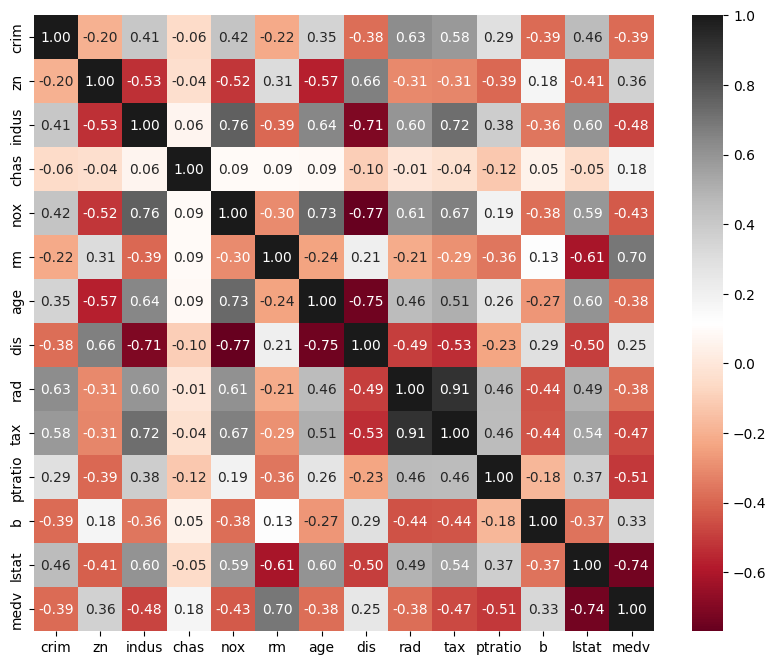

In [46]:
# Matrice de corrélation
correlation_matrix=data.corr()
# Création d'une heatmap
plt.figure(figsize=(10,8))  # Taille de la figure
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdGy', cbar=True)
plt.show()


On note donc que les deux variables les plus corrélées à la variable target 'medv' sont 'lstat' et 'rm'.

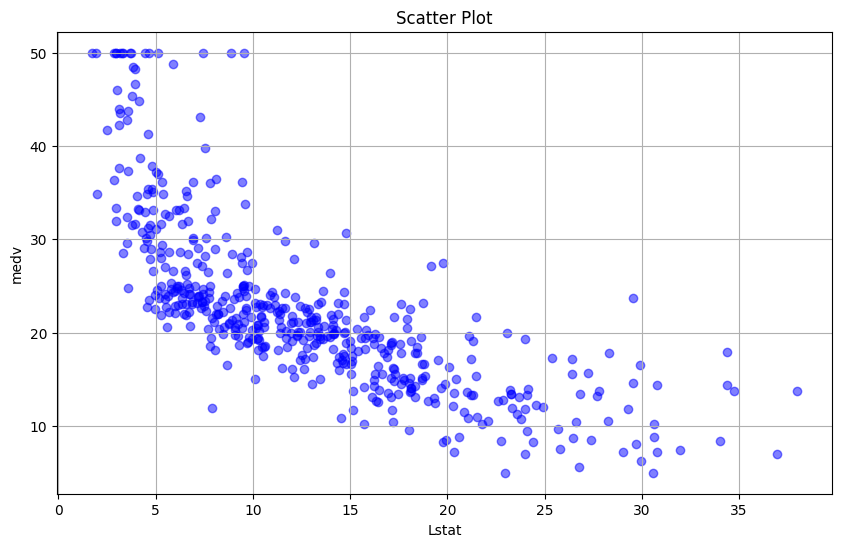

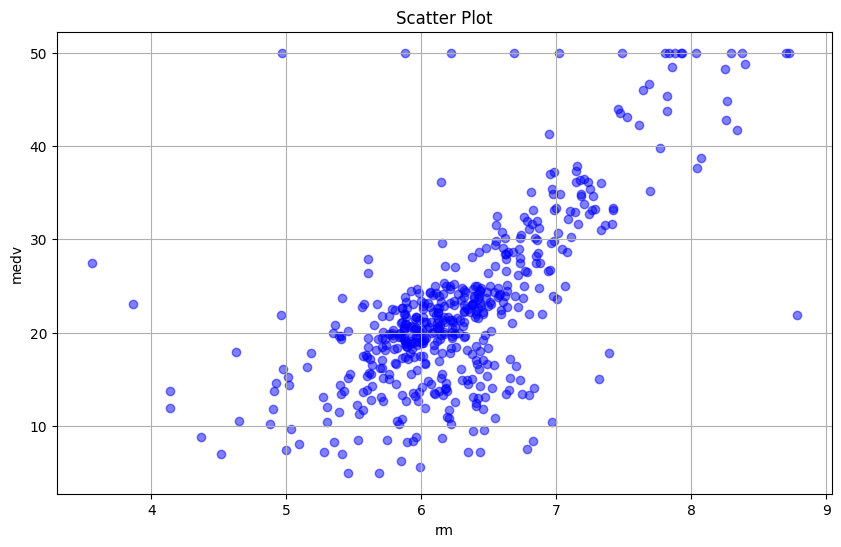

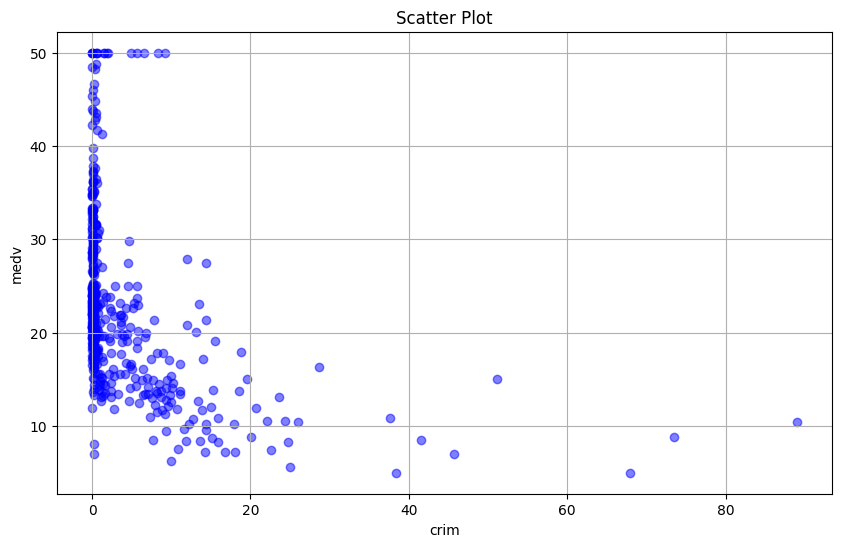

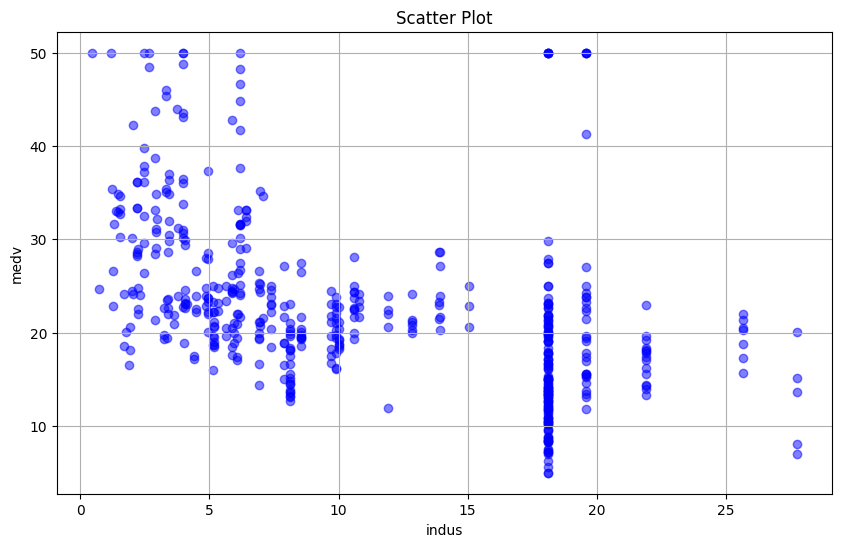

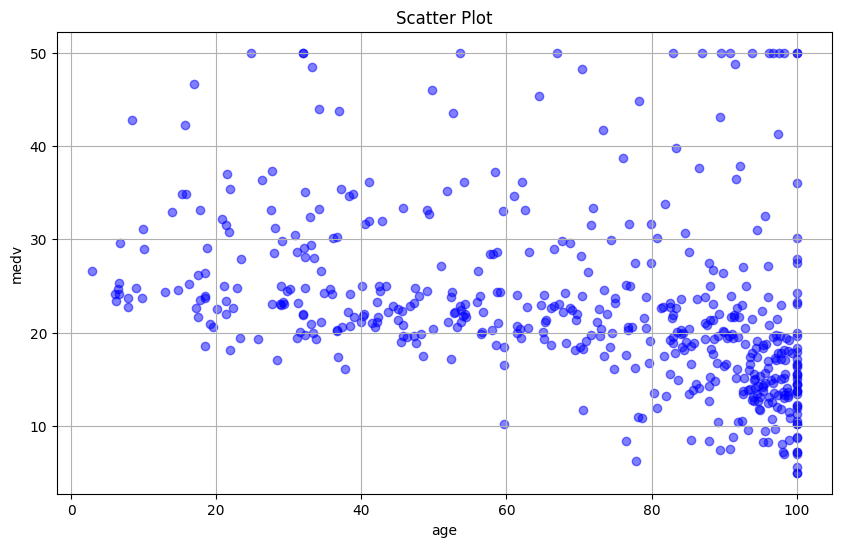

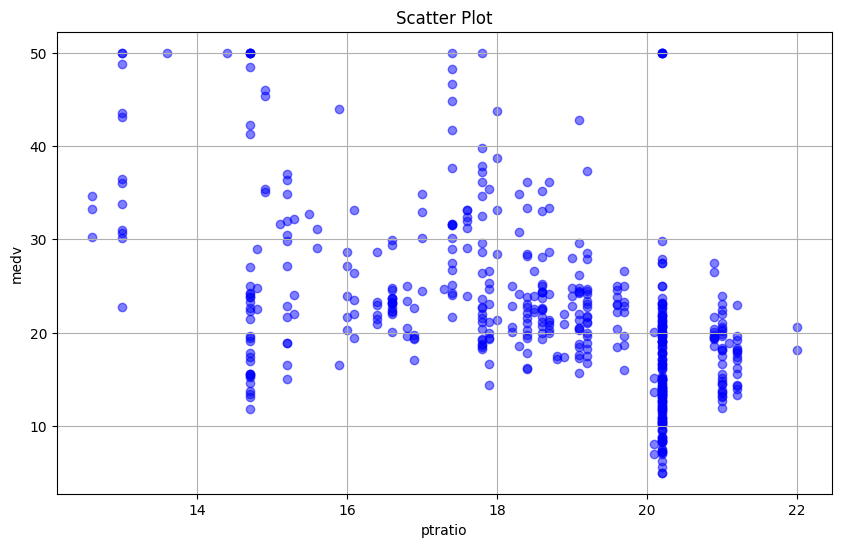

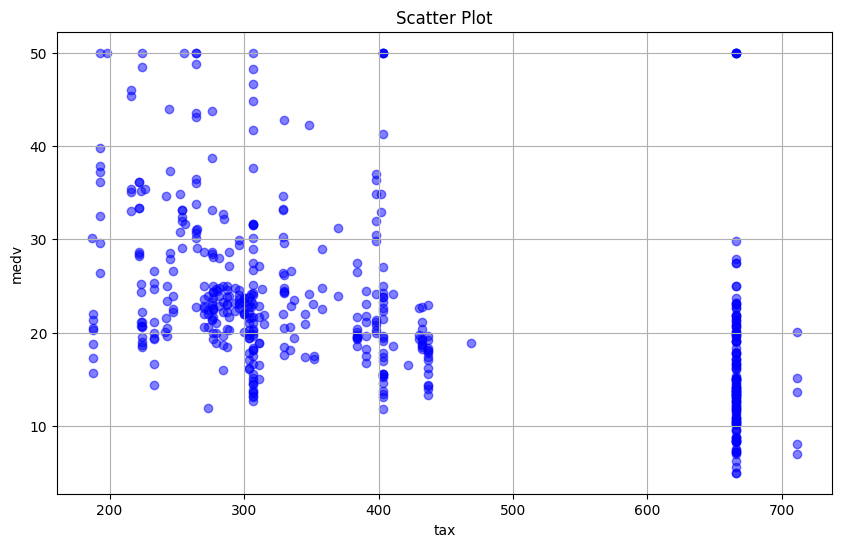

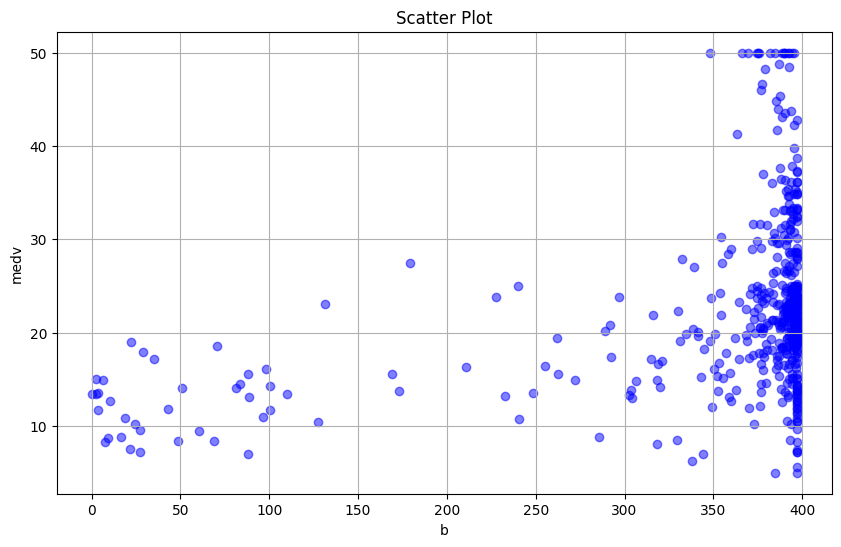

In [158]:
#nuages de points entre la variable target medv  et les variables de prédiction les plus pertinentes

def plot_scatter(data, x_var, y_var, title='Scatter Plot', xlabel='X Axis', ylabel='Y Axis', color='blue', alpha=0.5):
    """
    Génère un nuage de points des variables spécifiées dans un DataFrame.

    """
    plt.figure(figsize=(10, 6))  # Taille du graphique
    plt.scatter(data[x_var], data[y_var], color=color, alpha=alpha)  # Création du scatter plot
    plt.title(title)  # Ajout du titre
    plt.xlabel(xlabel)  # Label de l'axe des abscisses
    plt.ylabel(ylabel)  # Label de l'axe des ordonnées
    plt.grid(True)  # Ajout d'une grille
    plt.show()  # Affichage du graphique


plot_scatter(data,'lstat','medv',ylabel='medv',xlabel='Lstat')
plot_scatter(data,'rm','medv',ylabel='medv',xlabel='rm')
plot_scatter(data,'crim','medv',ylabel='medv',xlabel='crim')
plot_scatter(data,'indus','medv',ylabel='medv',xlabel='indus')
plot_scatter(data,'age','medv',ylabel='medv',xlabel='age')
plot_scatter(data,'ptratio','medv',ylabel='medv',xlabel='ptratio')
plot_scatter(data,'tax','medv',ylabel='medv',xlabel='tax')
plot_scatter(data,'b','medv',ylabel='medv',xlabel='b')

In [51]:
#Préparation des données pour la régression linéaire

selected=['lstat','rm'] #données les plus corrélées à la variable target
selected_data= data[selected]
selected_data.head()


def normalize_column(data, column_name):
    """
    Normalise une colonne du DataFrame.

    Retourne:
    - Series contenant les valeurs normalisées de la colonne.
    """
    min_value = data[column_name].min()
    max_value = data[column_name].max()
    normalized_column = (data[column_name] - min_value) / (max_value - min_value)
    return normalized_column

def standardize_column(data, column_name):
    """
    Standardise une colonne du DataFrame.
    
    Retourne:
    - Series contenant les valeurs standardisées de la colonne.
    """
    mean_value = data[column_name].mean()
    std_deviation = data[column_name].std()
    standardized_column = (data[column_name] - mean_value) / std_deviation
    return standardized_column

stlstat=standardize_column(selected_data, 'lstat')
strm=standardize_column(selected_data, 'rm')
standardized_data=pd.DataFrame({'stlstat':stlstat,'strm': strm})
nlstat=normalize_column(selected_data, 'lstat')
nrm=normalize_column(selected_data, 'rm')
normalized_data=pd.DataFrame({'nlstat':nlstat,'nrm': nrm})

X_train, X_test, y_train, y_test = train_test_split(selected_data, data['medv'], test_size=0.2, random_state=42)
stX_train, stX_test,sty_train,sty_test= train_test_split(standardized_data, data['medv'], test_size=0.2, random_state=42)
nX_train, nX_test, ry_train, ry_test = train_test_split(selected_data, data['medv'], test_size=0.2, random_state=42)


3. Modélisation
4. Optimisation des modèles
5. Visualisation des résultats

In [63]:
#Régression linéaire 

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Mean Squared Error: 31.24329060178364
R² Score: 0.5739577415025856


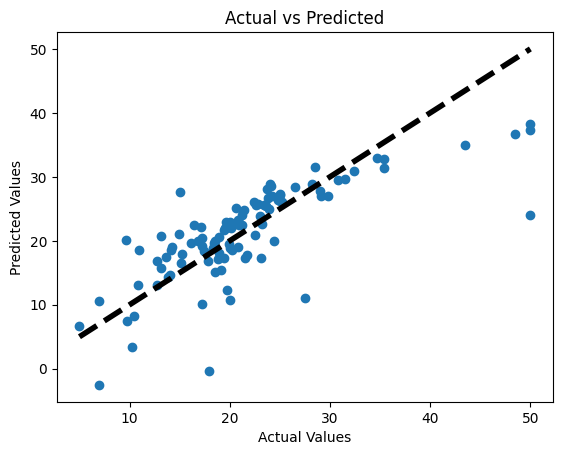

In [64]:
#affichage des résultats du modèle de régression linéaire 
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Ligne parfaite pour référence
plt.show()




/Users/raph4/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


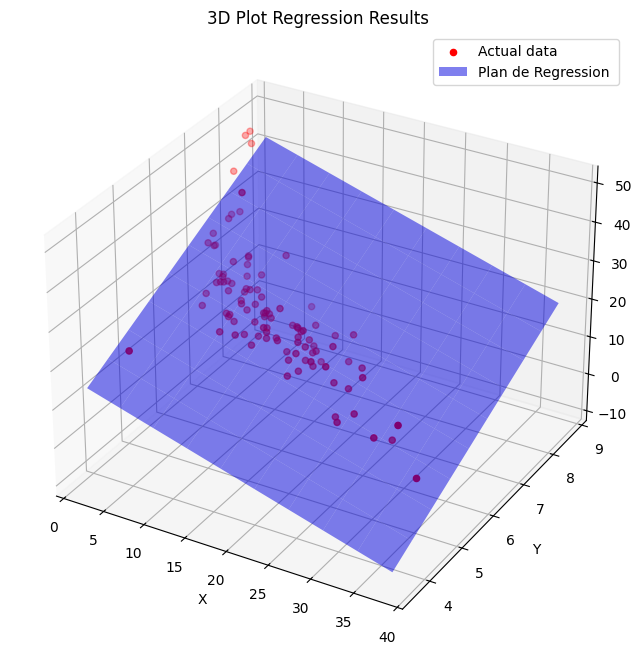

In [174]:

x = np.linspace(selected_data['lstat'].min(), selected_data['lstat'].max(), 10)
y = np.linspace(selected_data['rm'].min(), selected_data['rm'].max(), 10)
x_grid, y_grid = np.meshgrid(x, y)
z_pred = model.predict(np.array([x_grid.ravel(), y_grid.ravel()]).T).reshape(x_grid.shape)

#représentation 3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Nuage de points des données de test
ax.scatter(X_test['lstat'], X_test['rm'], y_test, color='red', label='Actual data')

# Surface de prédiction
ax.plot_surface(x_grid, y_grid, z_pred, color='blue', alpha=0.5, edgecolor='none', label='Plan de Regression ')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot Regression Results')
ax.legend()

plt.show()


Mean Squared Error: 31.243290601783638
R² Score: 0.5739577415025857


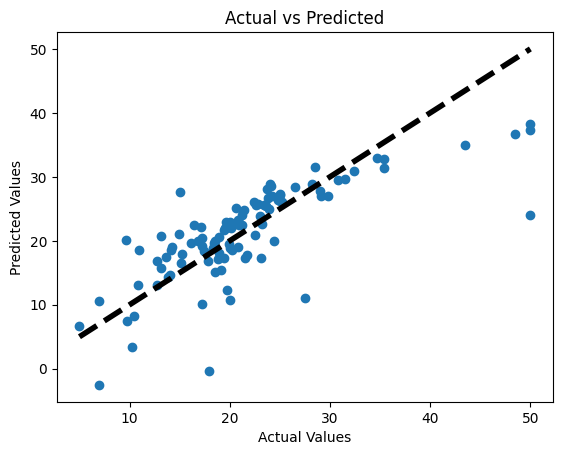

In [69]:
#Régression linéaire sur données standardisées
stmodel = LinearRegression()
stmodel.fit(stX_train, sty_train)
sty_pred = stmodel.predict(stX_test)
stmse = mean_squared_error(sty_test, sty_pred)
str2 = r2_score(sty_test, sty_pred)

print("Mean Squared Error:", stmse)
print("R² Score:", str2)

plt.scatter(sty_test, sty_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([sty_test.min(), sty_test.max()], [sty_test.min(), sty_test.max()], 'k--', lw=4)  # Ligne parfaite pour référence
plt.show()



In [118]:
#Préparation complète des données pour modèles de prédiction complexes
X = data.drop('medv', axis=1)  # Toutes les colonnes sauf la cible
y = data['medv']               # La colonne cible

# Séparation en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [119]:
#Random Forest Model
# Création de l'instance du modèle
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraînement du modèle
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [120]:
# Prédiction sur l'ensemble de test
y_pred = rf.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


Mean Squared Error: 8.02232131372549
R² Score: 0.8906053803853673


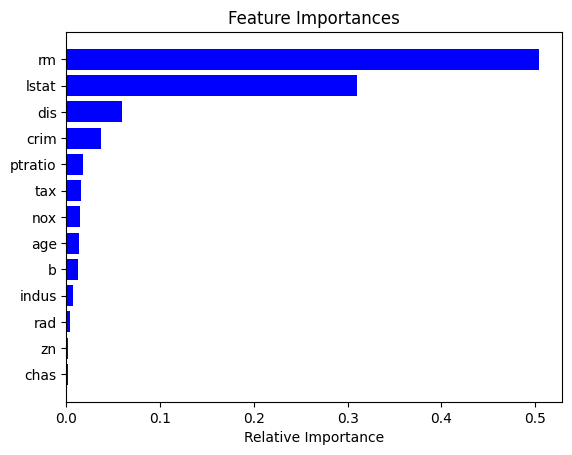

In [121]:
#affichage de l'importance relative des features dans le modèle de random forest

features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


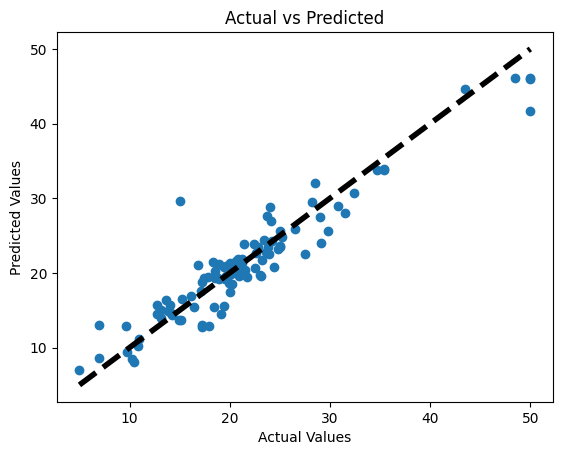

In [75]:
#Affichage des résultats du modèle de random forest
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Ligne parfaite pour référence
plt.show()

In [170]:
#Optimisation des hyperparamètres du modèle de Random Forest

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_

/Users/raph4/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
526 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/raph4/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raph4/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/raph4/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_cons

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

Meilleur modèle: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error du meilleur modèle: 10.231219607843135
R² Score: 0.860484224774337


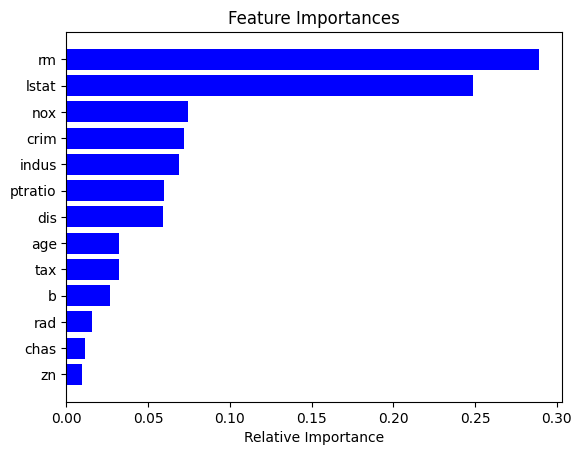

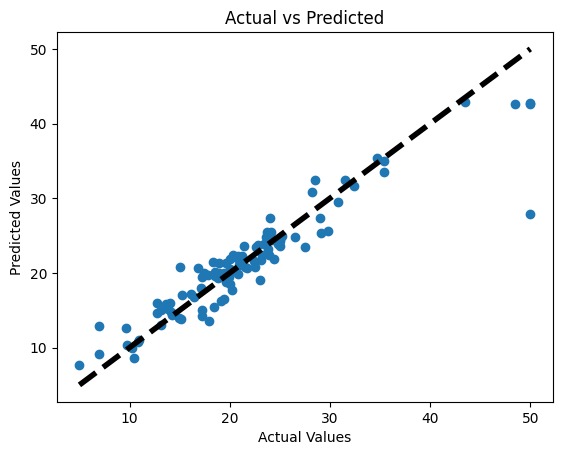

In [171]:
#visualisation des résultats du meilleurs modèle après optimisation
best_rf = grid_search.best_estimator_
print("Meilleur modèle:", grid_search.best_params_)

# Performance du meilleur modèle
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error du meilleur modèle:", mse)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


features = X.columns
importances = best_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Ligne parfaite pour référence
plt.show()

Les résultats de l'optimisations de sont pas forcément concluant en ce qui concerne l'amélioration du MSE et du R2. Cependant on observe tout de même une évolution de l'importance des features.

In [134]:
#reprise des données

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [161]:
#Modèle SVR de prédiction
# Création du modèle SVR
svr = SVR(kernel='rbf', C=5, gamma=0.1, epsilon=0.5)

# Entraînement du modèle
svr.fit(X_train_scaled, y_train)


SVR(C=5, epsilon=1, gamma=0.1)

Mean Squared Error du meilleur modèle: 74.3602687674616
R² Score: -0.01399744514604584


/Users/raph4/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


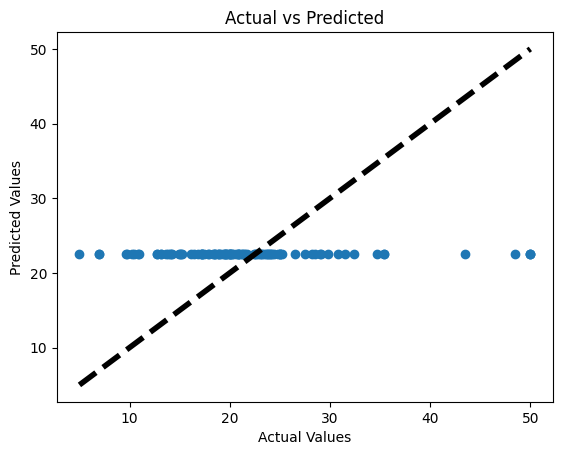

In [162]:
#Visualisation des résultats
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error du meilleur modèle:", mse)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Ligne parfaite pour référence
plt.show()

In [132]:
#Tentative d'optimisation des hyperparamètres pour le modèle SVR

# Définition de la grille de paramètres
param_grid = {
    'C': [ 100,150,250,500],
    'gamma': [ 0.1, 0.05,0.025,0.01],
    'epsilon': [0.9,0.75, 0.5, 0.1],
    'kernel': ['rbf']
}

# Création de la recherche sur grille
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Entraînement
grid_search.fit(X_train_scaled, y_train)

# Meilleurs paramètres et score
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score:", -grid_search.best_score_)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ..........C=100, epsilon=0.9, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..........C=100, epsilon=0.9, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..........C=100, epsilon=0.9, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..........C=100, epsilon=0.9, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..........C=100, epsilon=0.9, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........C=100, epsilon=0.9, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END .........C=100, epsilon=0.9, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END .........C=100, epsilon=0.9, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END .........C=100, epsilon=0.9, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END .........C=100, epsilon=0.9, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END ........C=100, epsilon=0.9, gamma=0.025, kernel=rbf; total time=   0.0s
[CV] END ........C=100, epsilon=0.9, gamma=0.02

Meilleur modèle: {'C': 250, 'epsilon': 0.5, 'gamma': 0.05, 'kernel': 'rbf'}
Mean Squared Error du meilleur modèle: 109.95443163119809
R² Score: -0.49936941601410023


/Users/raph4/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


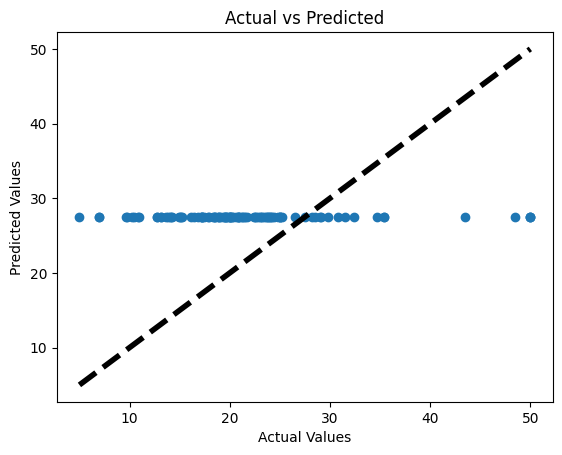

In [133]:
##Visualisation des résultats du meilleur modèle SVR 

best_rf = grid_search.best_estimator_
print("Meilleur modèle:", grid_search.best_params_)

# Performance du meilleur modèle
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error du meilleur modèle:", mse)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)





plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Ligne parfaite pour référence
plt.show()

Le modèle de SVR ne semble pas optimisé pour prédire la variable target en fonction des paramètres présents et de la base de données. En effet, après plusieurs tests d'optimisation des hyperparamètres (ie en changeant le domaine de variation de C, d'Epsilon et de Gamma). On obtiens à chaque fois un résultats similaire qui est une prédiction égale à la moyenne pour toutes les valeurs.

In [145]:
#Reprise des données

X = data.drop('medv', axis=1)  # Supprimer la colonne cible pour obtenir les caractéristiques
y = data['medv']               # La colonne cible

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionnel: Standardisation des caractéristiques pour améliorer les performances
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [146]:
##Modèle de Gradient Boosting

# Création de l'instance du modèle de Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entraînement du modèle
gbr.fit(X_train_scaled, y_train)


GradientBoostingRegressor(random_state=42)

Mean Squared Error: 6.240173122766323
R² Score: 0.914907252103386


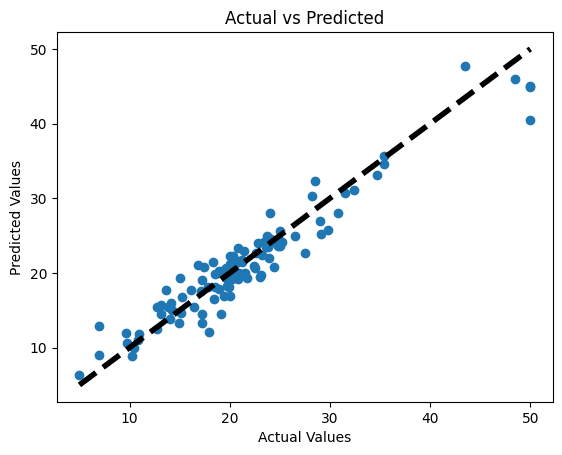

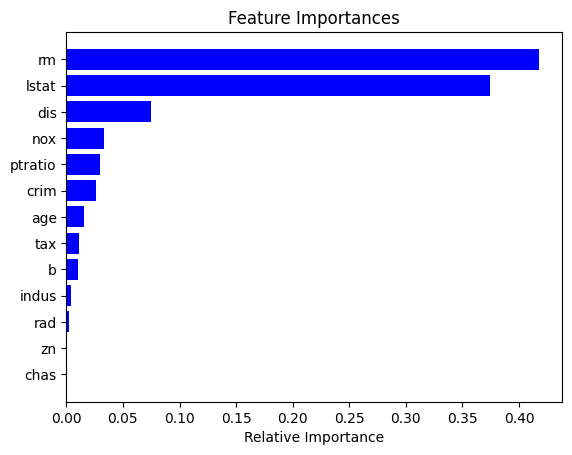

In [172]:
#Visualisation des performances

# Prédiction sur l'ensemble de test
y_pred = gbr.predict(X_test_scaled)

# Calcul de l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Ligne parfaite pour référence
plt.show()

features = X.columns
importances = gbr.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [148]:
##Optimisation des hyperparamètres du modèle de Gradient boosting

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
print("Meilleurs paramètres:", grid_search.best_params_)


Meilleurs paramètres: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}


Mean Squared Error: 6.559741571067656
R² Score: 0.9105495272659438


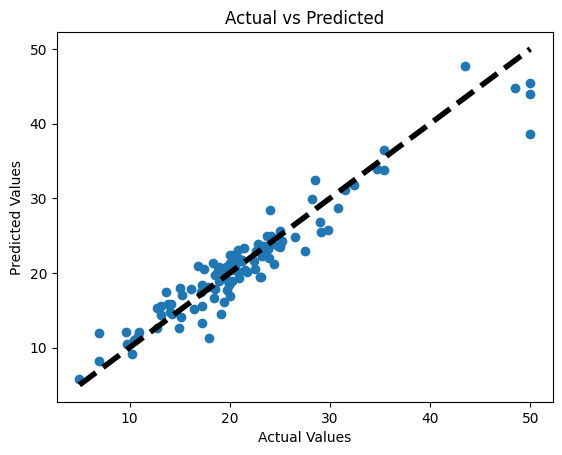

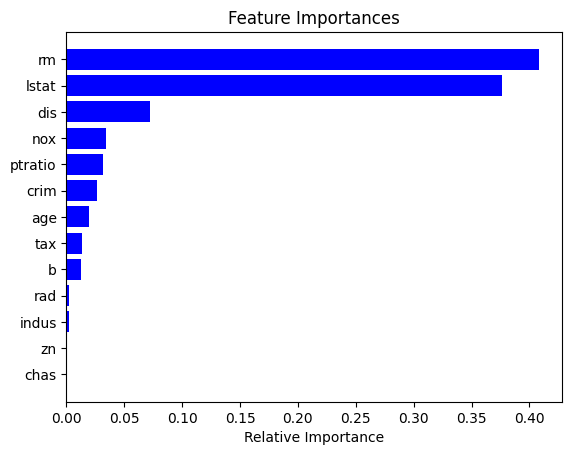

In [173]:
#Utilisation du meilleur modèle et résultats

# Création de l'instance du modèle de Gradient Boosting
opti_gbr = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42)

# Entraînement du modèle
opti_gbr.fit(X_train_scaled, y_train)
# Prédiction sur l'ensemble de test
y_pred = opti_gbr.predict(X_test_scaled)

# Calcul de l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Ligne parfaite pour référence
plt.show()

features = X.columns
importances = opti_gbr.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

l'optimisation des hyperparamètres est encore une fois peu intéressante en ce qui concerne l'optimisation du MSE et du R2. Cependant, dasn ce modèle nl'optimisation n'a pas eu de grands effets sur l'importance relative des features.
Le modèle de Gradient Boosting est celui qui donne les meilleurs résultats de prédictions car c'est celui qui possède le plus petit MSE et le lus grand R².

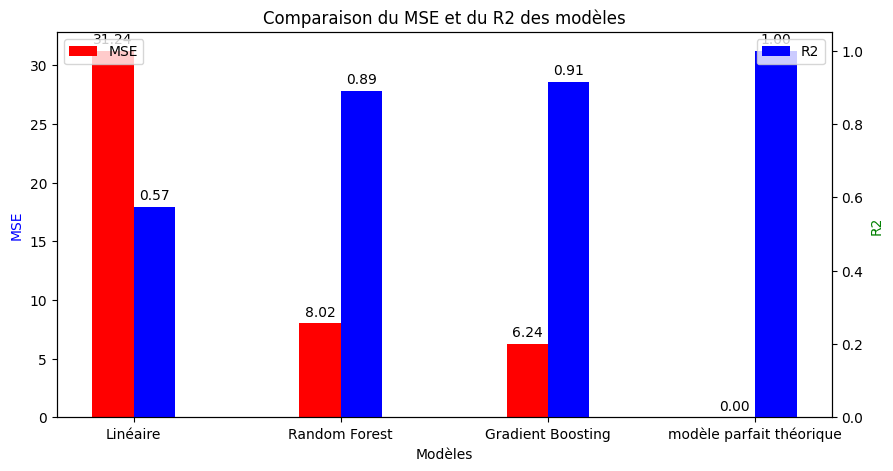

In [167]:
# Comparatif des résultats des modèles

mse_tab=[31.24329060178364,8.02232131372549,6.240173122766323,0]
R2_tab=[0.5739577415025856,0.8906053803853673,0.914907252103386,1]
modeles=['Linéaire','Random Forest','Gradient Boosting','modèle parfait théorique']

# Indices des modèles pour le positionnement des barres sur l'axe des x
x = np.arange(len(modeles))

# Création d'une figure et d'un ensemble d'axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Graphique à barres pour MSE
width = 0.2 # Largeur des barres
rects1 = ax1.bar(x - width/2, mse_tab, width, label='MSE', color='r')

# Création d'un deuxième axe pour les valeurs R2
ax2 = ax1.twinx()  # Instanciation d'un deuxième axe ayant le même axe x
rects2 = ax2.bar(x + width/2, R2_tab, width, label='R2', color='b')

# Ajout de labels, titre et légende personnalisée
ax1.set_xlabel('Modèles')
ax1.set_ylabel('MSE', color='b')
ax2.set_ylabel('R2', color='g')
ax1.set_title('Comparaison du MSE et du R2 des modèles')
ax1.set_xticks(x)
ax1.set_xticklabels(modeles)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Fonction pour ajouter des labels aux barres
def autolabel(rects, ax, data_format):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(data_format.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1, ax1, '{:.2f}')
autolabel(rects2, ax2, '{:.2f}')

plt.show()

On observe bien avec cette représenbtation graphique que le modèle le plus proche du modèle théorique parfait est le modèle de Gradient Boosting.

Pour conclure, l'ensemble des modèles donne une prédiction du prix moyen de l'immobilier dans un quartier par la variable 'MEDV'. On observe dans l'ensemble des modèles une importance relative significative des variables 'RM'(Nombre moyen de pièces par logement) et 'LSTAT'(% de personnes de classe sociale 'Inferieure'). Cela confirme l'idée intuitive que le prix de l'immobilier dépend du nombre de pièces (taille du logement) et du niveau de vie des habitants du quartier. On observe par ailleurs une importance relativement faible de variables qui auraient pu paraître importantes à première vue comme 'INDUS'(Proportion d’acres commerciaux non liés au commerce de détail par ville) et'RAD'(Indice d’accessibilité aux autoroutes radiales). En effet, on aurait pu immaginer que l'accessibilité aux autoroutes et la proximité avec une zone industrielle auraient pu être un indicateur significatif respectivement positif et négatif pour la prédiction du prix de l'immobilier.